In [1]:
import tensorflow as tf
import pandas as pd#for visualization of data and anaylsis
import matplotlib.pyplot as plt#for plotting and data visualization
import os #interacting with the operating system
import numpy as np #numerical anaylsis
import seaborn as sns # for data visulaization enhanced version
import cv2 #to read image
import glob #to return all the file paths belonging to a particular file-type
import PIL #python image library for maipulating storage of image files
import shutil
#modules from scikit-image for image processing and in-built algorithms and other
#utilities for image processing
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps
#for neural imaging
!pip install nilearn
#nilearn helps in neural imaging and enhanced viewing of brain
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers.legacy import Adam
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
#using brats 2020 dataset to segment the brain tumours using resunet model gliomas tumour segmentation
#Creating a dict for defining various classes
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE',
    2 : 'EDEMA',
    3 : 'ENHANCING'
}
VOLUME_SLICES = 100
VOLUME_START_AT = 22


In [3]:
!pip install kaggle
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation",force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshsharma2356
Your Kaggle Key: ··········


100%|██████████| 4.16G/4.16G [00:47<00:00, 93.7MB/s]


In [5]:
import matplotlib.image as img

Text(0.5, 1.0, 'Mask')

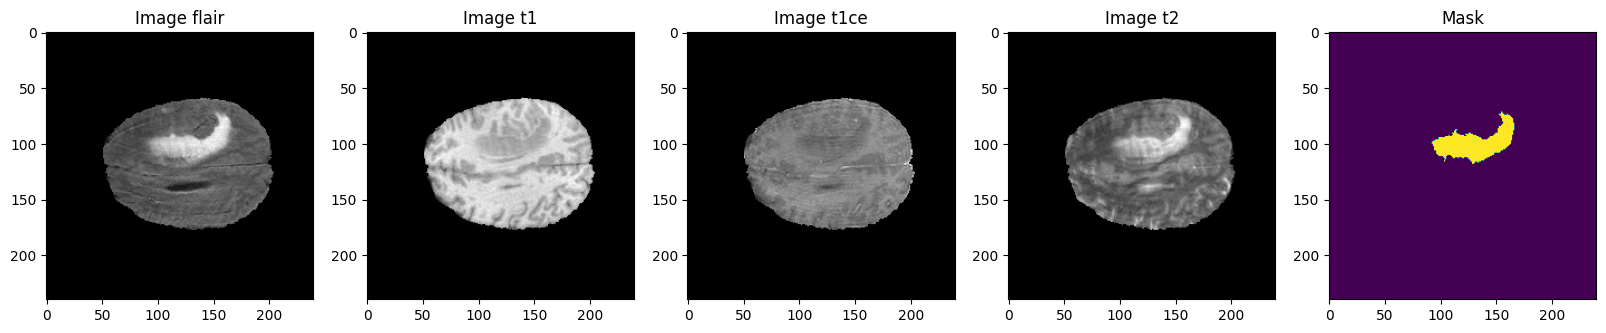

In [7]:
from IPython.testing import test
#Dataset setup

#Defining paths respectively for train,test and validation dataset
TRAIN_DATASET_PATH = 'brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
VALIDATION_DATASET_PATH = '/content/brats20-dataset-training-validation/BraTS2020_TrainingData'
test_image_flair=nib.load('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
test_image_t1 = nib.load('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
test_image_t1ce = nib.load('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
test_image_t2=nib.load('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
test_mask  = nib.load('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
#reshaping the memmap in which array of image is stored to get valid shape
ax1.imshow(test_image_flair[:,:,100], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,100], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,100], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,100], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,100])
ax5.set_title('Mask')


(240, 37200)


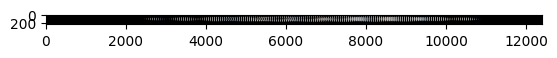

In [45]:
scaler = MinMaxScaler()
img = np.reshape(test_image_flair,(240,240*155))
print(img.shape)
scaler.fit(img)
scaler.transform(img)
img = np.reshape(img,(240,240,155))
img = np.reshape(img,(240,80*155,3))
img = img.astype('uint8')
plt.subplot()
plt.imshow(img)

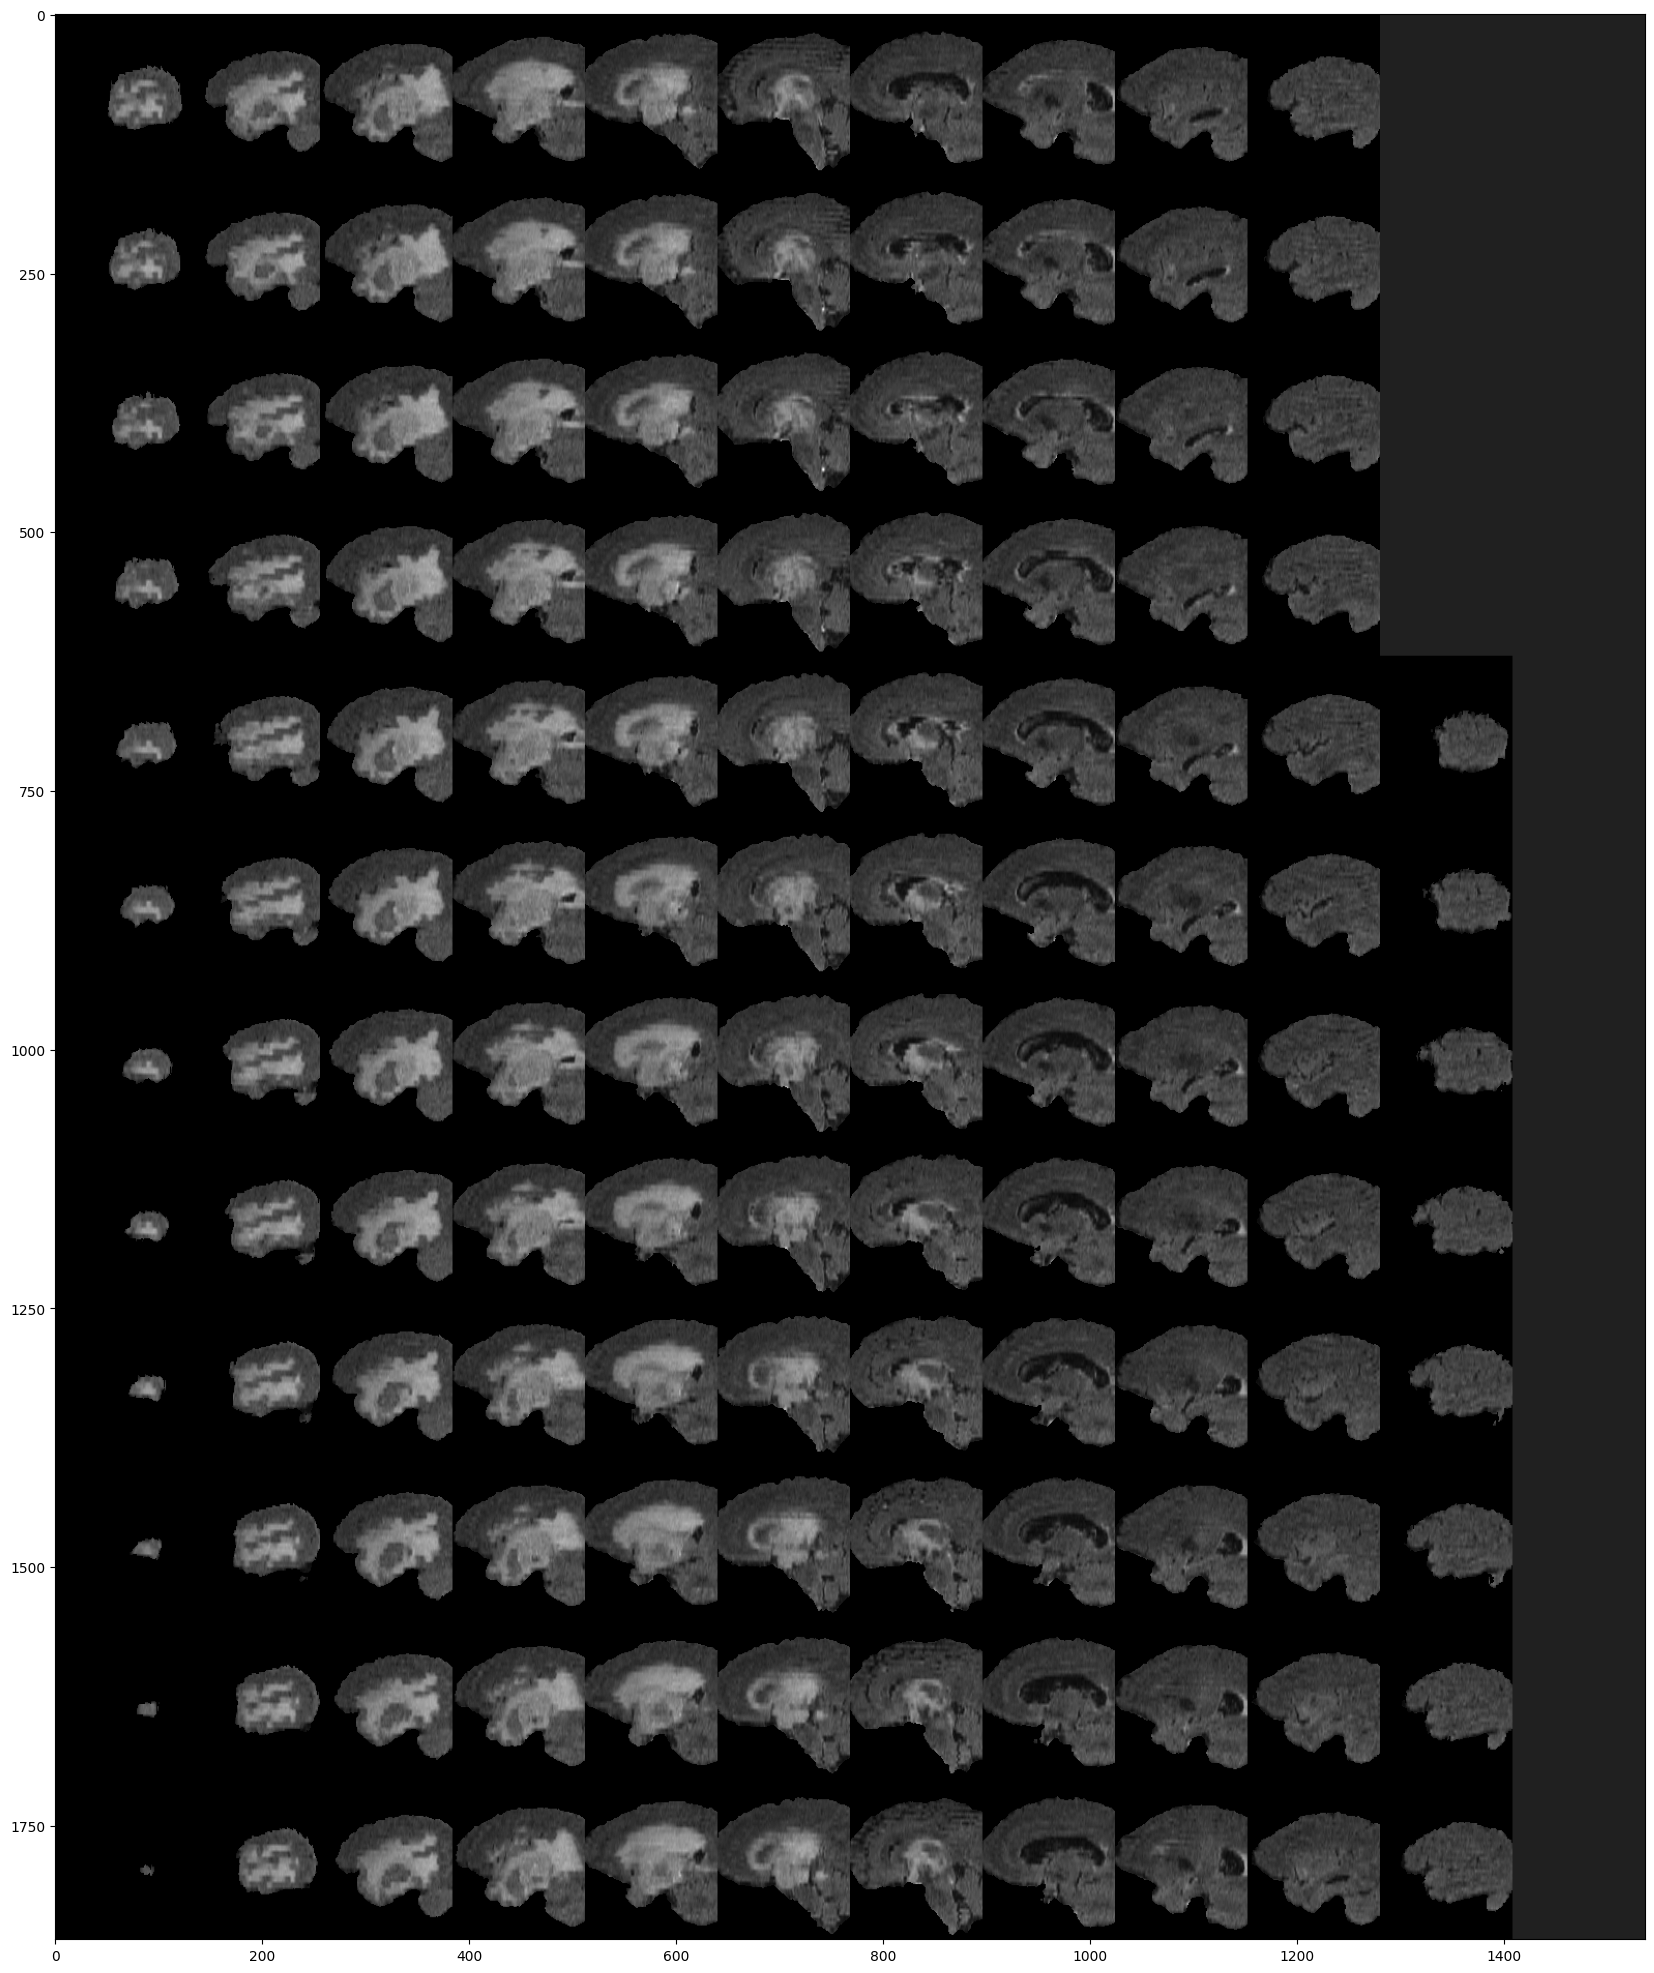

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize = (25,25))
#Creation of monatage of images of test_image_t1 rotating by 90
ax1.imshow(rotate(montage(test_image_flair[50:178,50:178,:]), 90, resize=True), cmap ='gray')

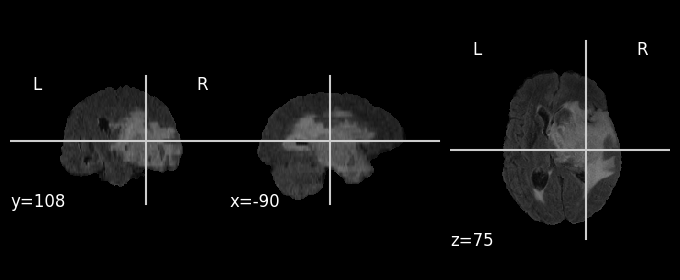

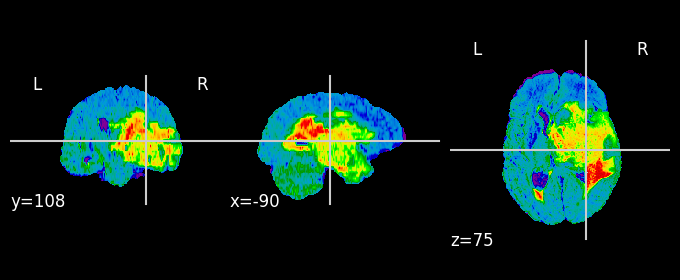

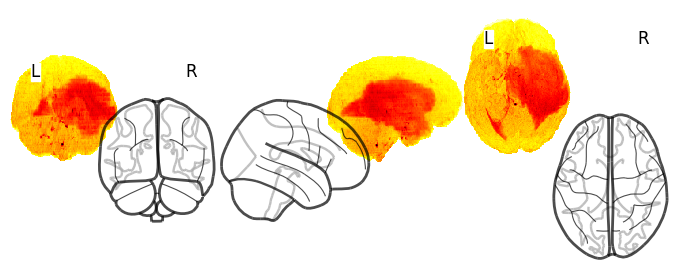

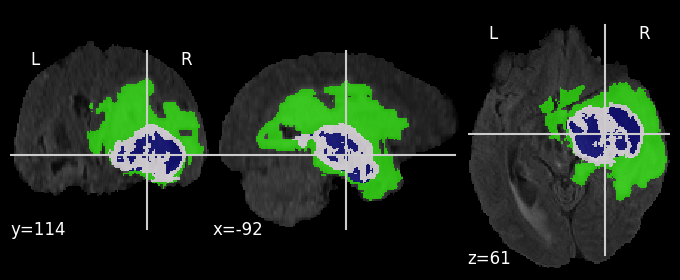

In [ ]:
niimg = nl.image.load_img('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii')
niimask = nl.image.load_img('/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii')
nlplt.plot_anat(niimg)
nlplt.plot_epi(niimg)
nlplt.plot_glass_brain(niimg)
nlplt.plot_roi(niimask,bg_img=niimg)

In [46]:
IMG_SIZE = 128

In [129]:
#Res-net block to be created for each sub units for both encoding and decoding portions
#Each will consist of 2 (3 x 3) convolutional blocks with a stem as the first layer
#The below function executes the batch normalization and activation function layer
def bn_act(x,act = True):
  x = keras.layers.BatchNormalization()(x)
  if act == True:
    x = keras.layers.Activation("relu")(x)
  return x
#Convolutional block consiting of 2 conv2d layers with default stride of 2
def conv_block(x,filters,kernel_size=(3,3),padding = "same",strides = 1):
  #conv = keras.layers.Conv2D(filters,kernel_size,strides = strides,padding = padding)(x)
  conv = bn_act(x)
  conv = keras.layers.Conv2D(filters,kernel_size,strides = strides,padding = padding)(conv)
  return conv
 #stem block for the first residual unit having stride as 1
def stem_block(x,filters,kernel_size=(3,3),padding = "same",strides = 1):
  conv = keras.layers.Conv2D(filters,kernel_size,padding = padding,strides = strides)(x)
  conv = conv_block(conv,filters,kernel_size=kernel_size,padding = padding,strides = strides)

  shortcut = keras.layers.Conv2D(filters,kernel_size=(1,1),padding = padding,strides = strides)(x)
  shortcut = bn_act(shortcut,act = False)
  #shortcut = x
  output = keras.layers.Add()([conv,shortcut])
  return output
def residual_block(x,filters,kernel_size = (3,3),padding = "same",strides = 1):
  res = conv_block(x,filters,kernel_size = kernel_size,padding = padding,strides = strides)
  res = conv_block(res,filters,kernel_size = kernel_size,padding = padding,strides = 1)

  shortcut = keras.layers.Conv2D(filters,kernel_size = (1,1),padding = padding,strides = strides)(x)
  shortcut = bn_act(shortcut,act = False)
  output = keras.layers.Add()([shortcut,res])
  return output
#upsampling and concatnation layer used during upsampling
def upsample_concat_block(x,xskip):
  u = keras.layers.UpSampling2D((2,2))(x)
  c = keras.layers.Concatenate()([u,xskip])
  return c


###ResUnet

In [130]:
#ResUnet consisting of encoder,decoder and bridging after reaching the bottleneck
#Encoder consists of downsampling and no concatenation using residual block created above
def ResUNet():
  inputs = keras.layers.Input((IMG_SIZE,IMG_SIZE,3))
  #Downsampling till the bottle_neck is reached ie the maximum features have been extracted and the desired segmentation map has been obtained
  f = [16,32,64,128,256]
  e0 = inputs

  e1 = stem_block(e0,f[0])

  e2 = residual_block(e1,f[1],strides = 2)

  e3 = residual_block(e2,f[2],strides = 2)

  e4 = residual_block(e3,f[3],strides = 2)

  e5 = residual_block(e4,f[4],strides = 2)

  #Bridge it makes the joining between the last ouptput of the downsampling layer with the upsampling layer
  b0 = conv_block(e5,f[4],strides = 1)
  b1 = conv_block(b0,f[4],strides = 1)
  #Decoding or upsampling
  u1 = upsample_concat_block(b1,e4)
  d1 = residual_block(u1,f[4])

  u2 = upsample_concat_block(d1,e3)
  d2 = residual_block(u2,f[3])

  u3 = upsample_concat_block(d2,e2)
  d3 = residual_block(u3,f[2])

  u4 = upsample_concat_block(d3,e1)
  d4 = residual_block(u4,f[1])

  #output layer containg the reconstucted map
  #16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)
  output = keras.layers.Conv2D(1,(1,1),padding = "same",activation = "sigmoid"  )(d4)
  model = keras.models.Model(inputs,output)
  return model



In [131]:
model = ResUNet()
model.summary()
model.output.shape
#plot_model(model,show_shapes = True)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_256 (Conv2D)            (None, 128, 128, 16  448         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_239 (Batch  (None, 128, 128, 16  64         ['conv2d_256[0][0]']             
 Normalization)                 )                                                           

TensorShape([None, 128, 128, 1])

###DATA FEEDER

In [132]:
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]
train_and_val_directories
#data cleaning
train_and_val_directories.remove('brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355')
arr1 = np.array(train_and_val_directories)
#Taking all the sub-folders and accessing to the folders present inside the innermost folder containing all images
def path(dirList):
  x = []
  for i in range(0,len(dirList)):
     x.append(dirList[i][dirList[i].rfind('/')+1:])
  return x
train_and_test_sub_dir = path(train_and_val_directories)
 #train and test ids will contain all the folders containing all the images from the
 #train dataset to create seperate train and test dataset
train_and_test_sub_dir

['BraTS20_Training_113',
 'BraTS20_Training_264',
 'BraTS20_Training_198',
 'BraTS20_Training_023',
 'BraTS20_Training_047',
 'BraTS20_Training_167',
 'BraTS20_Training_211',
 'BraTS20_Training_196',
 'BraTS20_Training_254',
 'BraTS20_Training_185',
 'BraTS20_Training_225',
 'BraTS20_Training_067',
 'BraTS20_Training_203',
 'BraTS20_Training_288',
 'BraTS20_Training_268',
 'BraTS20_Training_029',
 'BraTS20_Training_245',
 'BraTS20_Training_365',
 'BraTS20_Training_293',
 'BraTS20_Training_249',
 'BraTS20_Training_092',
 'BraTS20_Training_158',
 'BraTS20_Training_191',
 'BraTS20_Training_133',
 'BraTS20_Training_359',
 'BraTS20_Training_315',
 'BraTS20_Training_314',
 'BraTS20_Training_125',
 'BraTS20_Training_256',
 'BraTS20_Training_038',
 'BraTS20_Training_234',
 'BraTS20_Training_117',
 'BraTS20_Training_367',
 'BraTS20_Training_132',
 'BraTS20_Training_286',
 'BraTS20_Training_307',
 'BraTS20_Training_080',
 'BraTS20_Training_018',
 'BraTS20_Training_280',
 'BraTS20_Training_323',


In [119]:
train_test_ids,val_ids = train_test_split(train_and_test_sub_dir,test_size = 0.20)
train_ids,test_ids = train_test_split(train_test_ids,test_size = 0.15)

In [69]:
len(test_ids)

45

In [70]:
len(val_ids)

74

In [71]:
train_ids

['BraTS20_Training_007',
 'BraTS20_Training_269',
 'BraTS20_Training_313',
 'BraTS20_Training_292',
 'BraTS20_Training_143',
 'BraTS20_Training_188',
 'BraTS20_Training_368',
 'BraTS20_Training_028',
 'BraTS20_Training_352',
 'BraTS20_Training_122',
 'BraTS20_Training_271',
 'BraTS20_Training_332',
 'BraTS20_Training_141',
 'BraTS20_Training_174',
 'BraTS20_Training_232',
 'BraTS20_Training_290',
 'BraTS20_Training_284',
 'BraTS20_Training_071',
 'BraTS20_Training_032',
 'BraTS20_Training_169',
 'BraTS20_Training_303',
 'BraTS20_Training_197',
 'BraTS20_Training_259',
 'BraTS20_Training_225',
 'BraTS20_Training_070',
 'BraTS20_Training_144',
 'BraTS20_Training_287',
 'BraTS20_Training_362',
 'BraTS20_Training_133',
 'BraTS20_Training_048',
 'BraTS20_Training_216',
 'BraTS20_Training_351',
 'BraTS20_Training_139',
 'BraTS20_Training_168',
 'BraTS20_Training_129',
 'BraTS20_Training_162',
 'BraTS20_Training_027',
 'BraTS20_Training_256',
 'BraTS20_Training_083',
 'BraTS20_Training_049',


In [133]:
class DataGenerator(keras.utils.Sequence):

    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 3, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))


        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)
            data_path = os.path.join(case_path, f'{i}_flair.nii');
            flair = nib.load(data_path).get_fdata()

            data_path = os.path.join(case_path, f'{i}_t1ce.nii');
            ce = nib.load(data_path).get_fdata()

            data_path = os.path.join(case_path, f'{i}_seg.nii');
            seg = nib.load(data_path).get_fdata()

            for j in range(VOLUME_SLICES):
                 X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                 X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                 y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];

        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        print(Y.shape)
        return X/np.max(X), Y

training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)
#arr1 = np.array(training_generator)
# arr1.shape

In [140]:
config = model.get_config()
config

{'name': 'model_8',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 128, 128, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_11'},
   'name': 'input_11',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_256',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_256',
   'inbound_nodes': [[['input_11', 0, 0, {}]]]},
  {'cl

In [135]:
model.compile(
    tf.keras.optimizers.Adam(learning_rate = 0.1,epsilon = 0.5),
    #Using
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    metrics = ['accuracy']
)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience=5,min_delta=0.5)

In [136]:
history = model.fit(training_generator,epochs =20 ,validation_data=valid_generator)

KeyboardInterrupt: ignored

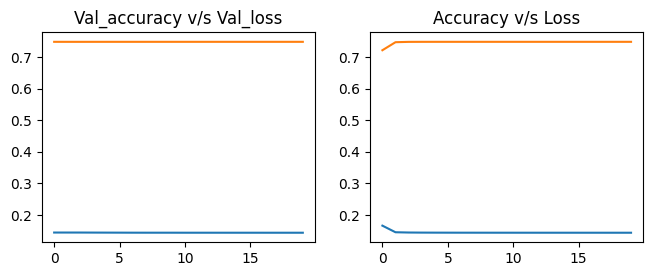

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(233)
plt.title('Accuracy v/s Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.subplot(232)
plt.title('Val_accuracy v/s Val_loss')
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])



In [ ]:
model.evaluate(test_generator)

45/45 [==============================] - 21s 458ms/step - loss: 0.1438 - accuracy: 0.7486


[0.14377841353416443, 0.7486493587493896]

In [ ]:
# mri type must one of 1) flair 2) t1 3) t1ce 4) t2 ------- or even 5) seg
# returns volume of specified study at `path`
def imageLoader(path):
  image = nib.load(path).get_fdata()
  X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
  for j in range(VOLUME_SLICES):
      X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(image[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
      X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

      y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
  return np.array(image)


# load nifti file at `path`
# and load each slice with mask from volume
# choose the mri type & resize to `IMG_SIZE`
def loadDataFromDir(path, list_of_files, mriType, n_images):
    scans = []
    masks = []
    for i in list_of_files[:n_images]:
        fullPath = glob.glob( i + '/*'+ mriType +'*')[0]
        currentScanVolume = imageLoader(fullPath)
        currentMaskVolume = imageLoader( glob.glob( i + '/*seg*')[0] )
        # for each slice in 3D volume, find also it's mask
        for j in range(0, currentScanVolume.shape[2]):
            scan_img = cv2.resize(currentScanVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            mask_img = cv2.resize(currentMaskVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            scans.append(scan_img[..., np.newaxis])
            masks.append(mask_img[..., np.newaxis])
    return np.array(scans, dtype='float32'), np.array(masks, dtype='float32')



In [ ]:
def predictByPath(case_path,case):


    files = next(os.walk(case_path))[2]
    #print(files)
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 3))
    print(X.shape)
  #  y = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE))

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii');
    flair=nib.load(vol_path).get_fdata()

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii');
    ce=nib.load(vol_path).get_fdata()

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t2.nii');
    t2=nib.load(vol_path).get_fdata()

    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
       # X[j,:,:2] = cv2.resize(t2[:,:,j+VOLUME_START_AT,3], (IMG_SIZE,IMG_SIZE,3))
    #print(X.shape)

  #  model.evaluate(x=X,y=y[:,:,:,0], callbacks= callbacks)
    z=model.predict(X)
    print(z.shape)
    return model.predict(X, verbose=1)


def showPredictsById(case, start_slice = 60):
  #MICCAI_BraTS2020_TrainingData/BraTS20_Training_095/BraTS20_Training_095_seg.nii
  # BraTS20_Training_095/BraTS20_Training_095_seg.nii
    path = f"/content/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
    gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
    p = predictByPath(path,case)
    print(p.shape)
    core = p[:,:,:,0]
    edema= p[:,:,:,0]
    enhancing = p[:,:,:,0]


    plt.figure(figsize=(18, 50))
    f, axarr = plt.subplots(1,6, figsize = (18, 50))

    for i in range(3): # for each image, add brain background
         axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)),cmap="gray", interpolation='none')

    axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].title.set_text('Original image flair')
    curr_gt=cv2.resize(gt[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3) # ,alpha=0.3,cmap='Reds'
    axarr[1].title.set_text('Ground truth')
    axarr[2].imshow(p[start_slice,:], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].title.set_text('all classes')
    plt.show()

(100, 128, 128, 3)
4/4 [==============================] - 0s 62ms/step
(100, 128, 128, 1)
4/4 [==============================] - 0s 53ms/step
(100, 128, 128, 1)


<Figure size 1800x5000 with 0 Axes>

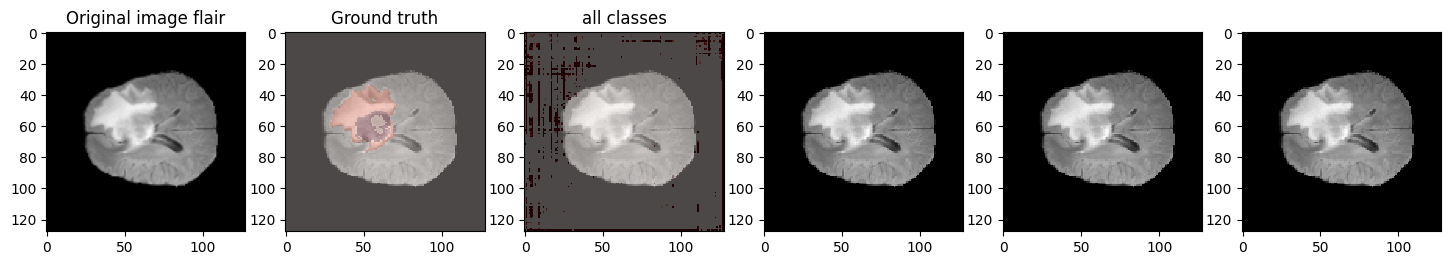

In [ ]:

showPredictsById(case=test_ids[0][-3:])